In [1]:
import cmocean.cm as cm
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

from salishsea_tools import places

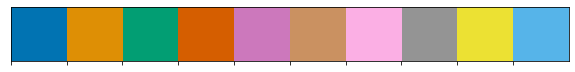

In [9]:
sns.set_palette(sns.color_palette("colorblind"))
mpy = sns.color_palette('colorblind')
sns.palplot(myp)
iobs = 2
i1702 = 0
iH18 = 9
iv3 = 4
iv4 = 5
sns.set(color_codes=True)
sns.set_context("talk")

In [45]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
wmask = mesh.tmask[0]

## Salinity ##

In [2]:
# Time Series
ci, cj = places.PLACES['Central node']['NEMO grid ji']
ck = places.PLACES['Central node']['NEMO grid k']

31.428281089442645 -0.0018365886085094543 v202111
31.428670265800054 -0.0019117396996508236 IWMix


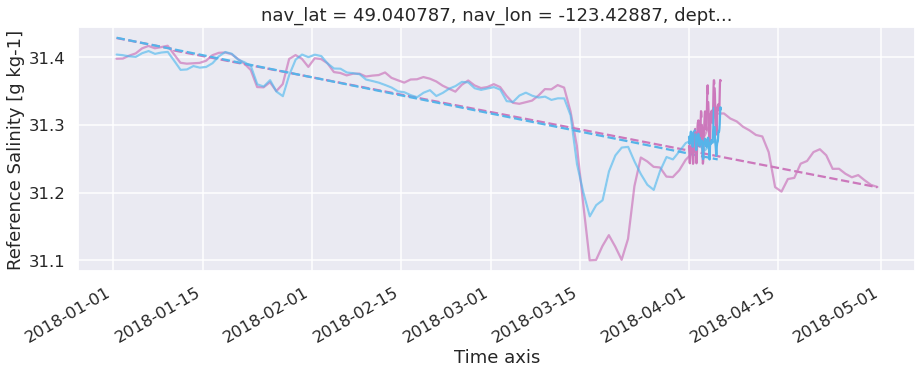

In [74]:
directory = '/home/sallen/MEOPAR/ANALYSIS/analysis-susan/notebooks/TimeSeries/'
vtimeseries3 = 'v202111'
vtimeseries4 = 'IWMix'
tail = '.npy'

placename = 'Central'
      
Base_model_results = np.load(directory + vtimeseries3 + placename+ 'jan18' + tail)
EMix_model_results = np.load(directory + vtimeseries4 + placename+ 'jan18' + tail)

for smonth in ['feb18', 'mar18', 'apr18', #'may18', #'jun17',
           #     'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17'
                  ]:
    Base_model_results = np.append(Base_model_results, np.load(directory + vtimeseries3 +placename+ smonth + tail), axis=1)
    EMix_model_results = np.append(EMix_model_results, np.load(directory + vtimeseries4 +placename+ smonth + tail), axis=1)
    
    
Base_sal_model = pd.Series(Base_model_results[1], index=Base_model_results[0])
Base_sal_model.index = pd.to_datetime(Base_sal_model.index, unit='h', origin=datetime.datetime(2007, 1, 1))
b, m = np.polynomial.polynomial.Polynomial.fit(np.arange(len(Base_sal_model.values)), Base_sal_model.values, 1, domain=(-1, 1))
print (b, m, 'v202111')

EMix_sal_model = pd.Series(EMix_model_results[1], index=EMix_model_results[0])
EMix_sal_model.index = pd.to_datetime(EMix_sal_model.index, unit='s', origin=datetime.datetime(1900, 1, 1))
bn, mn = np.polynomial.polynomial.Polynomial.fit(np.arange(len(EMix_sal_model.values)), EMix_sal_model.values, 1, domain=(-1, 1))
print (bn, mn, 'IWMix')
    
sns.set_palette(sns.color_palette("colorblind"))
myp = sns.color_palette()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

#Base_sal_model.plot(label='', color='white')
EMix_sal_model.plot(label='', color='white')

Base_sal_model.plot(label='v202111', color=myp[iv3], alpha=0.7)
ax.plot(Base_sal_model.index, b + m*np.arange(len(Base_sal_model.values)), '--', c=myp[iv3])

EMix_sal_model.plot(label='IWMix', color=myp[iH18], alpha=0.7);
ax.plot(EMix_sal_model.index, bn + mn*np.arange(len(EMix_sal_model.values)), '--', c=myp[iH18])

ndays = 5
month = 'apr'
imonth = '04'
startday = 0
for it, day in enumerate(range(1, ndays+1)):
    sday = f'{startday+day:02d}'
    v202111_phys = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_T.nc')
    new_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_T.nc')
    v202111_phys.vosaline[:, ck, ci, cj].plot(ax=ax, c=myp[iv3])
    new_phys.vosaline[:, ck, ci, cj].plot(ax=ax, c=myp[iH18])
    v202111_phys.close()
    new_phys.close()

In [75]:
sday = '05'
v202111_phys = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_T.nc')
new_phys = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_T.nc')

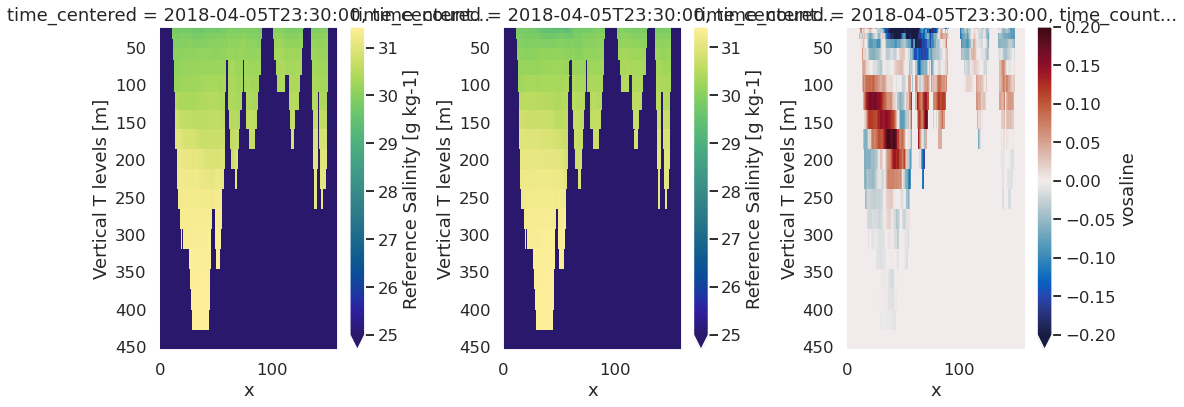

In [76]:
# Cross Section
xi = 500
xj1, xj2 = 200, 360
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
v202111_phys.vosaline[23, 20:, xi, xj1:xj2].plot(ax=axs[0], yincrease=False, cmap=cm.haline, vmin=25)
new_phys.vosaline[23, 20:, xi, xj1:xj2].plot(ax=axs[1], yincrease=False, cmap=cm.haline, vmin=25)
(new_phys.vosaline[23, 20:, xi, xj1:xj2] - v202111_phys.vosaline[23, :, xi, xj1:xj2]).plot(ax=axs[2], yincrease=False, 
                                                                                         cmap=cm.balance, vmin=-0.2, vmax=0.2)
fig.tight_layout();

## Kappa ##

In [77]:
#sday = 25
v202111_w = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_W.nc')
new_w = xr.open_dataset(f'/ocean/sallen/timbucktwo/oxygen/{sday}{month}18/SalishSea_1h_2018{imonth}{sday}_2018{imonth}{sday}_grid_W.nc')

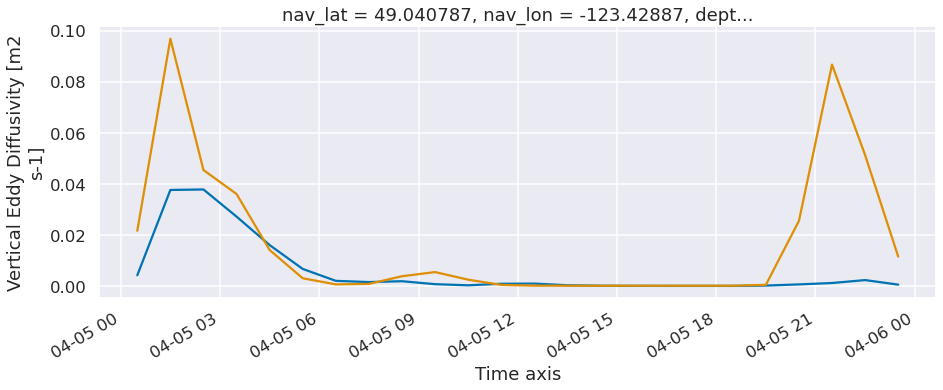

In [78]:
# Time Series
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
v202111_w.vert_eddy_diff[:, ck, ci, cj].plot(ax=ax)
new_w.vert_eddy_diff[:, ck, ci, cj].plot(ax=ax);

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


-3.0952992e-06
4.2059994e-05


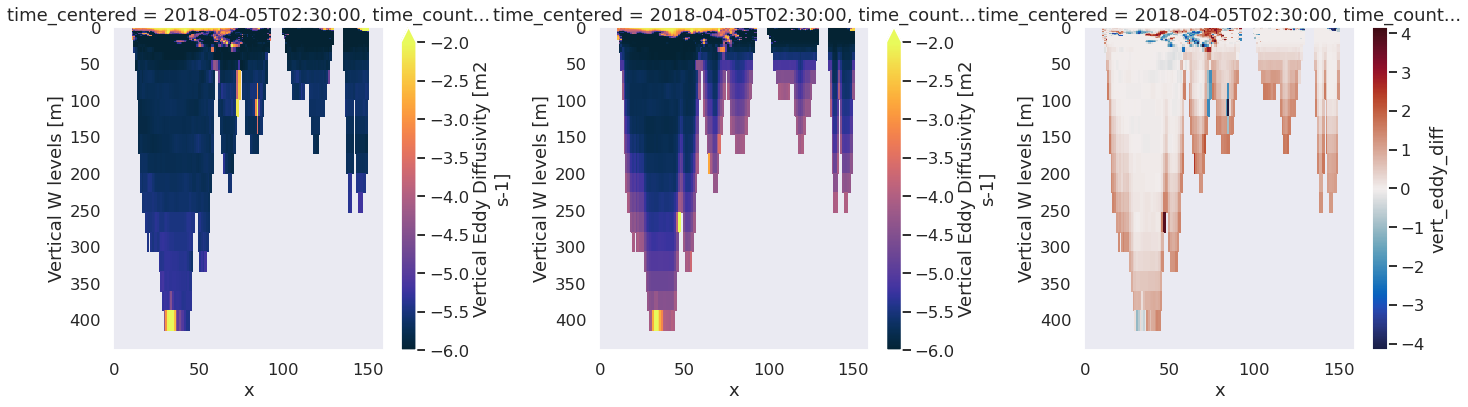

In [86]:
# Cross Section
it = 2
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
np.log10(v202111_w.vert_eddy_diff[it, :, xi, xj1:xj2]).plot(ax=axs[0], yincrease=False, 
                                                            cmap=cm.thermal, vmax=-2, vmin=-6)
np.log10(new_w.vert_eddy_diff[it, :, xi, xj1:xj2]).plot(ax=axs[1], yincrease=False, 
                                                        cmap=cm.thermal, vmax=-2, vmin=-6)
(np.log10(new_w.vert_eddy_diff[it, :, xi, xj1:xj2]) - np.log10(v202111_w.vert_eddy_diff[it, :, xi, xj1:xj2])).plot(ax=axs[2], yincrease=False, 
                                                                                         cmap=cm.balance);
fig.tight_layout();
print ((new_w.vert_eddy_diff[:, 20:, xi, xj1:xj2] - v202111_w.vert_eddy_diff[:, 20:, xi, xj1:xj2]).where(wmask[20:, xi, xj1:xj2]).mean().values)
print ((new_w.vert_eddy_diff[:, 32, xi, xj1:xj2] - v202111_w.vert_eddy_diff[:, 32, xi, xj1:xj2]).where(wmask[32, xi, xj1:xj2]).mean().values)

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


1.0402934e-05
0.0013086832


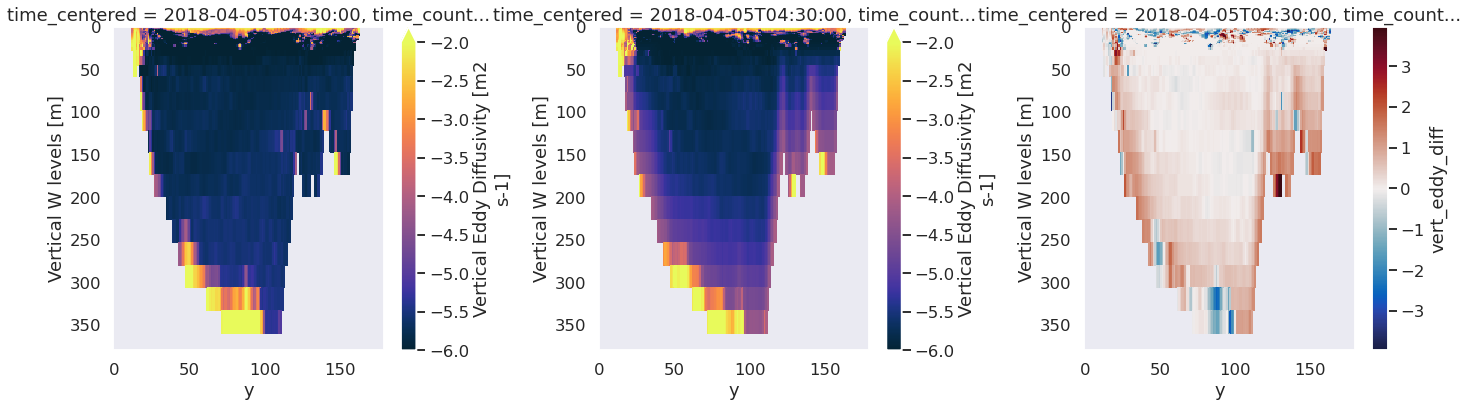

In [88]:
# Cross Section
it = 4
yj = 265
yi1, yi2 = 370, 550
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
np.log10(v202111_w.vert_eddy_diff[it, :, yi1:yi2, yj]).plot(ax=axs[0], yincrease=False, 
                                                            cmap=cm.thermal, vmax=-2, vmin=-6)
np.log10(new_w.vert_eddy_diff[it, :, yi1:yi2, yj]).plot(ax=axs[1], yincrease=False, 
                                                        cmap=cm.thermal, vmax=-2, vmin=-6)
(np.log10(new_w.vert_eddy_diff[it, :, yi1:yi2, yj]) - np.log10(v202111_w.vert_eddy_diff[it, :, yi1:yi2, yj])).plot(ax=axs[2], yincrease=False, 
                                                                                         cmap=cm.balance);
fig.tight_layout();
for ax in axs:
    ax.set_ylim(380, 0)
print ((new_w.vert_eddy_diff[:, 20:, yi1:yi2, yj] - v202111_w.vert_eddy_diff[:, 20:, yi1:yi2, yj]).where(wmask[20:, yi1:yi2, yj]).mean().values)
print ((new_w.vert_eddy_diff[:, 32, yi1:yi2, yj] - v202111_w.vert_eddy_diff[:, 32, yi1:yi2, yj]).where(wmask[32, yi1:yi2, yj]).mean().values)